**Cluster Technique for Customer Dataset**

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

Load Dataset

In [2]:
df = pd.read_csv(r"/content/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Preprocessing Dataset

In [4]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
x=df.iloc[:,[3,4]].values
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

Data Analysis

In [7]:
df1 = df[['Annual Income (k$)', 'Spending Score (1-100)']]
df1.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

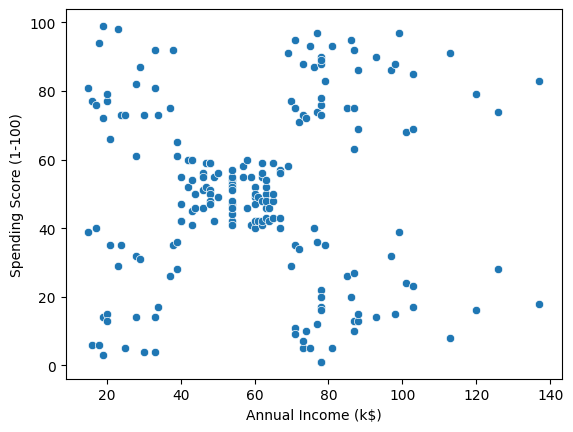

In [8]:
sns.scatterplot(x=df1['Annual Income (k$)'],y= df1['Spending Score (1-100)'])

In [9]:
from sklearn.cluster import KMeans
errors = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df1)
    errors.append(kmeans.inertia_)

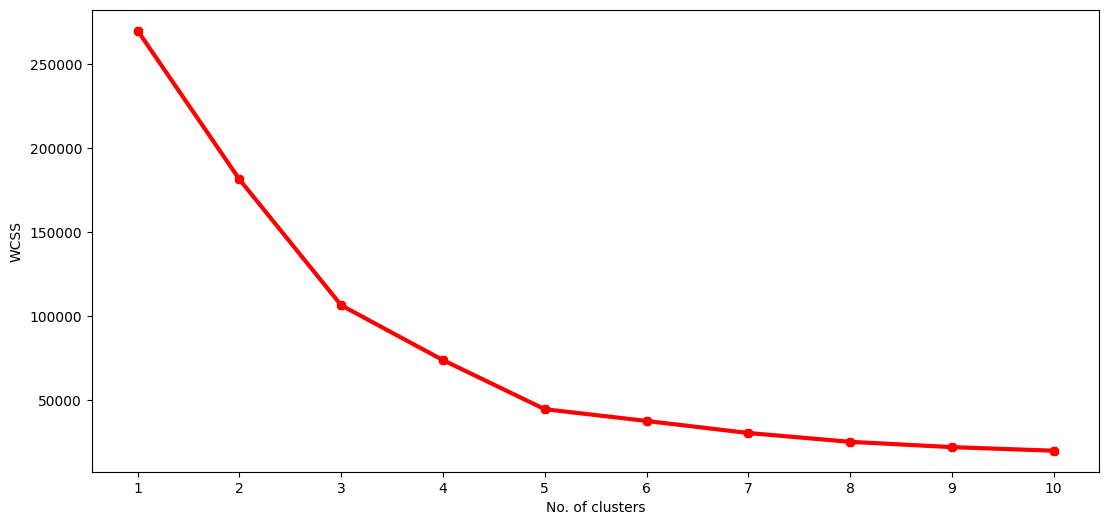

In [10]:
plt.figure(figsize=(13,6))
plt.plot(range(1,11), errors)
plt.plot(range(1,11), errors, linewidth=3, color='red', marker='8')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()

In [11]:
km = KMeans(n_clusters=5)
km.fit(df1)
y = km.predict(df1)
df1['Label'] = y
df1.head()

,Annual Income (k$),Spending Score (1-100),Label
0,15,39,0
1,15,81,4
2,16,6,0
3,16,77,4
4,17,40,0


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

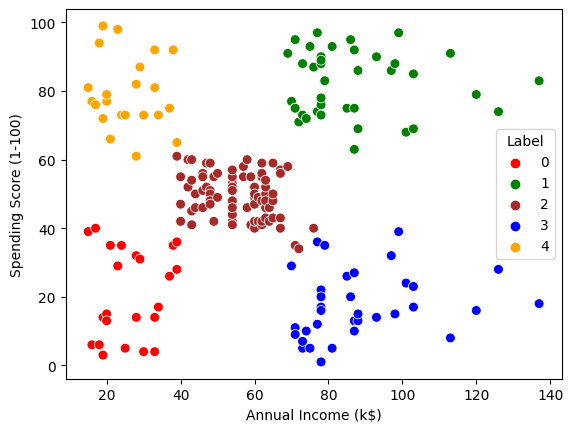

In [13]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df1, hue='Label', s=50, palette=['red', 'green', 'brown', 'blue', 'orange'])


In [14]:
df2 = df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']]
df2.head()

,Annual Income (k$),Spending Score (1-100),Age
0,15,39,19
1,15,81,21
2,16,6,20
3,16,77,23
4,17,40,31


In [15]:
errors = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df2)
    errors.append(kmeans.inertia_)

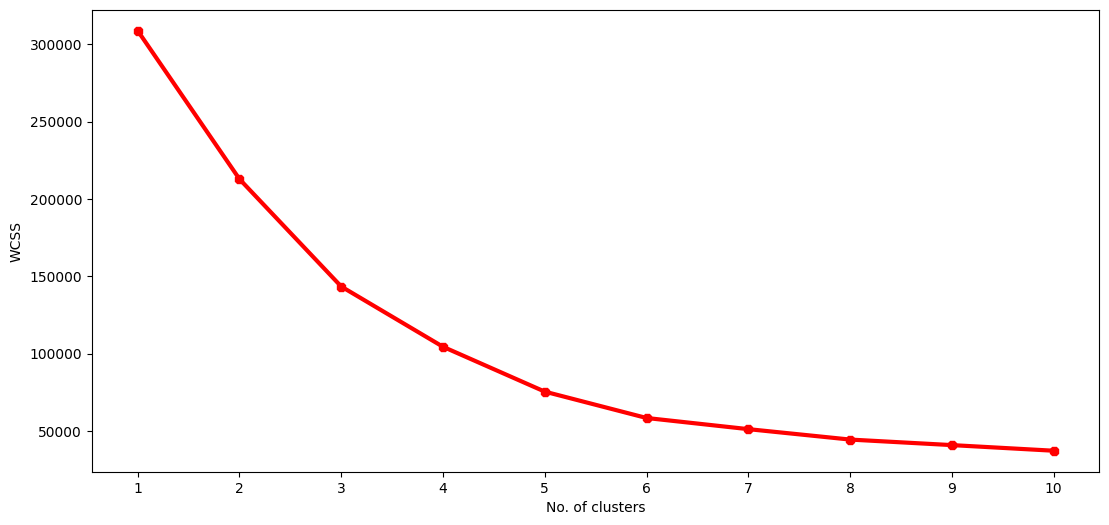

In [16]:
plt.figure(figsize=(13,6))
plt.plot(range(1,11), errors)
plt.plot(range(1,11), errors, linewidth=3, color='red', marker='8')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()

In [17]:
km = KMeans(n_clusters=5)
km.fit(df2)
y = km.predict(df2)
df2['Label'] = y
df2.head()

,Annual Income (k$),Spending Score (1-100),Age,Label
0,15,39,19,4
1,15,81,21,0
2,16,6,20,4
3,16,77,23,0
4,17,40,31,4


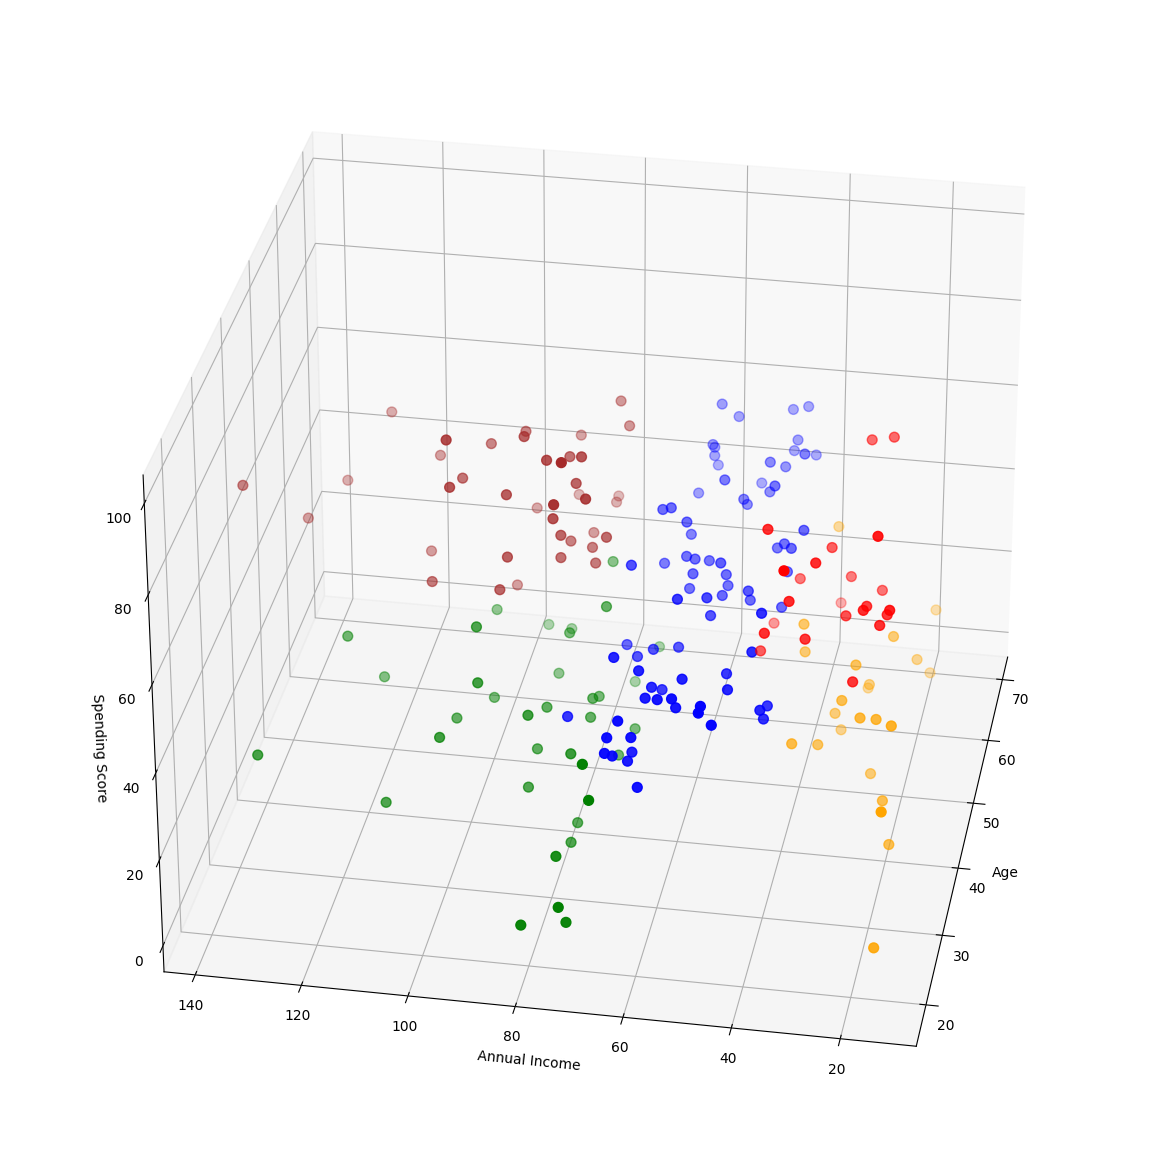

In [18]:
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df2['Age'][df2['Label']==0], df2['Annual Income (k$)'][df2['Label']==0], df2['Spending Score (1-100)'][df2['Label']==0], c='red', s=50)
ax.scatter(df2['Age'][df2['Label']==1], df2['Annual Income (k$)'][df2['Label']==1], df2['Spending Score (1-100)'][df2['Label']==1], c='green', s=50)
ax.scatter(df2['Age'][df2['Label']==2], df2['Annual Income (k$)'][df2['Label']==2], df2['Spending Score (1-100)'][df2['Label']==2], c='blue', s=50)
ax.scatter(df2['Age'][df2['Label']==3], df2['Annual Income (k$)'][df2['Label']==3], df2['Spending Score (1-100)'][df2['Label']==3], c='brown', s=50)
ax.scatter(df2['Age'][df2['Label']==4], df2['Annual Income (k$)'][df2['Label']==4], df2['Spending Score (1-100)'][df2['Label']==4], c='orange', s=50)
ax.view_init(30, 190)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.show()